# XGBRegressor

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

In [10]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    seed = 7
    np.random.seed(seed)
    train, validation = train_test_split(train, test_size=0.2, random_state=seed)    
    return train,validation 

In [11]:
train , validation = get_data()
train_target = train.Servidas
train.drop(['Servidas'],axis = 1 , inplace = True)
validation_target=validation.Servidas
validation.drop(['Servidas'],axis = 1 , inplace = True)

In [12]:
XGBModel = XGBRegressor()
XGBModel.fit(train,train_target , verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
XGBpredictions = XGBModel.predict(validation)
print('Decision Tree Regressor MAE = ', mean_absolute_error(validation_target , XGBpredictions))
print('Decision Tree Regressor R2 = ', r2_score(validation_target , XGBpredictions))

Decision Tree Regressor MAE =  572.529808861
Decision Tree Regressor R2 =  0.898860186732


In [18]:
# Plot the results
validation_=validation.values[100:110,:]
validation_target_=validation_target.values.reshape((validation_target.shape[0],1))[100:110,:]
predict1_=XGBpredictions.reshape((XGBpredictions.shape[0],1))[100:110,:]
validation_reduced = PCA(n_components=1).fit_transform(validation_)

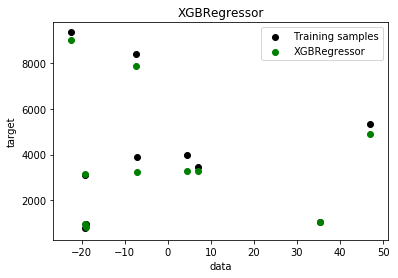

In [20]:
# A imagem mostra os dados verdadeiros em preto e em verde aqueles encontrados pela árvore de decisão
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training samples")
plt.scatter(validation_reduced,predict1_ , c="g", label="XGBRegressor")
#plt.scatter(validation_reduced, predict2_, c="r", label="n_estimators=300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("XGBRegressor")
plt.legend()
plt.show()